In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = pd.read_csv("C:\\Users\\Mayank\\Downloads\\Hospital_Data.csv\\Hospital_Data.csv")
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


data.info()

In [4]:
#DATA CLEANING
# we will now check if there is any null value/missing data bcz we need to remove it first
data.isnull().sum() 
#changing in original copy of data
# assign mean values to the missing values/NaN values 
data['Bed Grade'] = data['Bed Grade'].fillna(data['Bed Grade'].mean())
data['City_Code_Patient'] = data['City_Code_Patient'].fillna(data['City_Code_Patient'].mean())


Count of Type of Admission

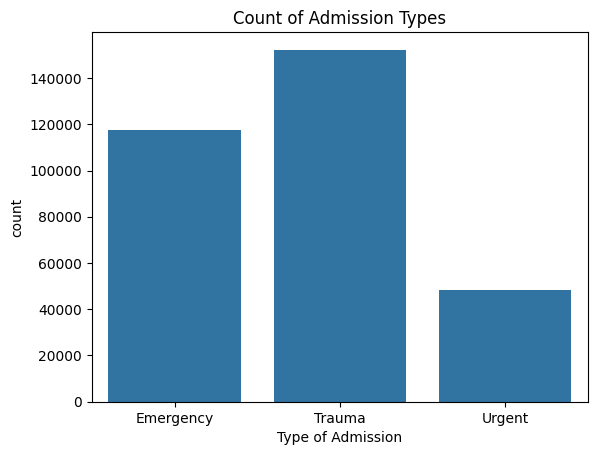

In [7]:
# eg emergeny, trauma,etc
sb.countplot(x='Type of Admission', data=data)
plt.title('Count of Admission Types')
plt.show()

Average Admission_Deposit by Hospital Type with Severity of Illness

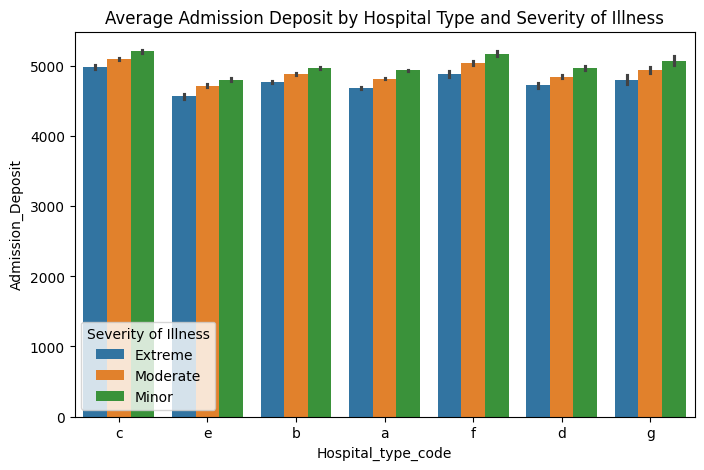

In [16]:
#To analyze how severity of illness impacts deposit amounts in different hospital types.
plt.figure(figsize=(8, 5))
sb.barplot(x='Hospital_type_code', y='Admission_Deposit', hue='Severity of Illness', data=data)
plt.title('Average Admission Deposit by Hospital Type and Severity of Illness')
plt.show()

Count of Type of Admission with Severity of Illness

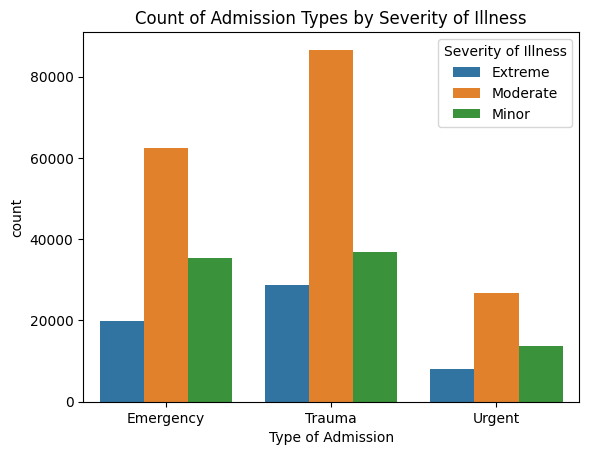

In [11]:
sb.countplot(x='Type of Admission', hue='Severity of Illness', data=data)
plt.title('Count of Admission Types by Severity of Illness')
plt.show()

Distribution of Type of Admission

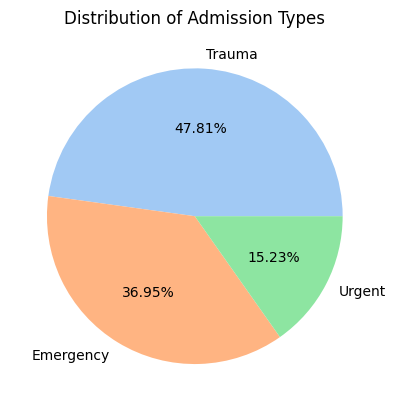

In [27]:
#To understand the overall proportion of different admission types.
index=data['Type of Admission'].value_counts().index
values=data['Type of Admission'].value_counts().values

plt.pie(values,labels=index,autopct='%1.2f%%', colors=sb.color_palette('pastel'))
plt.title('Distribution of Admission Types')

plt.show()

Correlations between different factors 

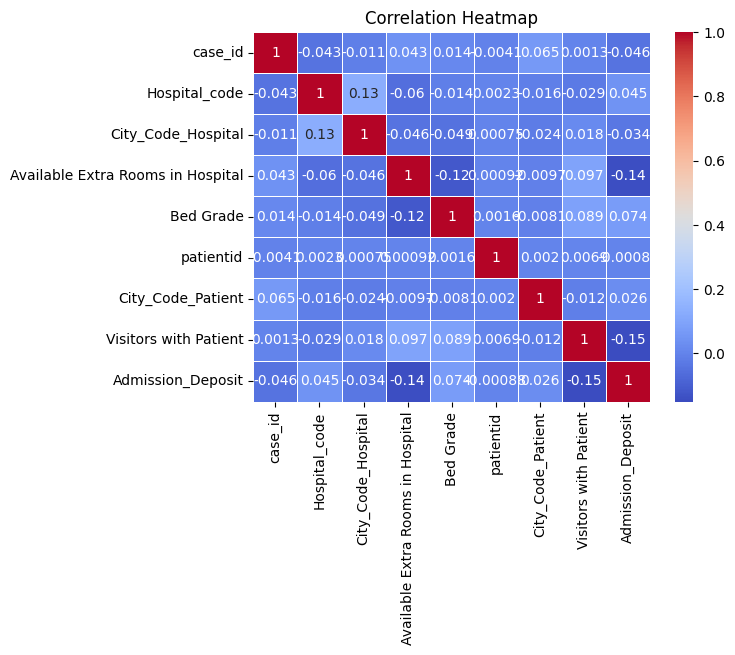

In [29]:
#correlations between factors like deposit, bed grade, and visitors,etc
corr = data.corr(numeric_only=True)
sb.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Trend of deposit amounts over time based on illness severity

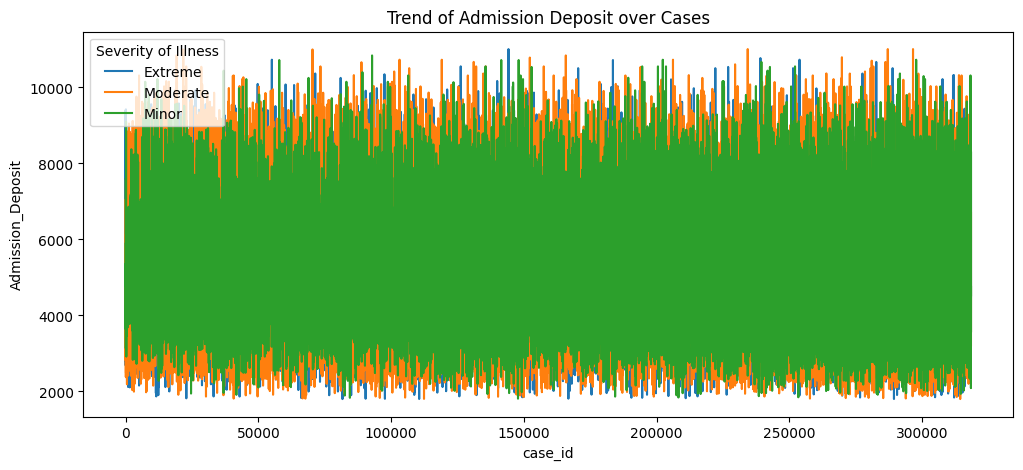

In [4]:
#To identify trends in deposit amounts over time or cases.
plt.figure(figsize=(12, 5))
sb.lineplot(x='case_id', y='Admission_Deposit',hue='Severity of Illness', data=data, color='blue')
plt.title('Trend of Admission Deposit over Cases')
plt.show()
